# Word Bin Counts Analysis

In [1]:
import os
import json
import random
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
dataset_dir = os.path.join('..','..','datasets','tracks_playlist_dataset')

json_file_path = os.path.join(dataset_dir,'word_count_data.json')

with open(json_file_path, 'r') as f:
    data = json.load(f)

In [3]:
list(data['global'].keys())[:10]

['candy',
 'offline',
 'funeral',
 'romance',
 'ultimate',
 'stars',
 'insomnia',
 'camille',
 'under',
 'workout']

## Global Word Count Analysis

In [4]:
# get sorted list of words across all tracks ranked by bin count
global_word_bins = data['global']
global_sorted_words = sorted(global_word_bins.items(), key=lambda x: x[1], reverse=True)

In [5]:
global_sorted_words[:10]

[('rock', 409894),
 ('oldies', 147719),
 ('classic', 147634),
 ('party', 128832),
 ('summer', 126412),
 ('good', 119145),
 ('chill', 113242),
 ('old', 107009),
 ('classics', 79934),
 ('workout', 79276)]

In [6]:
global_sorted_words[-10:]

[('bandona', 1),
 ('kiko', 1),
 ('cumbiaa', 1),
 ('norteña', 1),
 ('conjunto', 1),
 ('grupo', 1),
 ('ajua', 1),
 ('rebelution', 1),
 ('mirrey', 1),
 ('salseando', 1)]

In [7]:
bin_counts = np.array([x[1] for x in global_sorted_words])
bin_counts[:10]

array([409894, 147719, 147634, 128832, 126412, 119145, 113242, 107009,
        79934,  79276])

In [8]:
# How many words total
len(global_sorted_words)

9276

In [9]:
int(np.max(bin_counts))

409894

In [10]:
int(np.max(bin_counts[1:]))

147719

In [11]:
# How many words with only 1 bin count
int(sum(bin_counts == 1))

296

In [12]:
thresholds = [1e2, 1e3, 1e4, 1e5, 1e6]
order_counts = np.zeros(len(thresholds))

for i,t in enumerate(thresholds):
    order_counts[i] = int(sum(bin_counts < t))

print(thresholds)
print(order_counts)

[100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
[5143. 8616. 9194. 9268. 9276.]


In [13]:
for i in range(len(bin_counts)):
    if bin_counts[i]<100:
        print(i)
        break

4133


In [14]:
for i in range(len(bin_counts)):
    if bin_counts[i]<300:
        print(i)
        break

1893


In [15]:
for i in range(len(bin_counts)):
    if bin_counts[i]<1000:
        print(i)
        break

660


In [16]:
for i in range(len(bin_counts)):
    if bin_counts[i]<10000:
        print(i)
        break

82


In [17]:
# bin_counts_rev = bin_counts[::-1]
# incs = np.zeros(len(bin_counts_rev)-1)
# for i in range(len(bin_counts_rev)-1):
#     val = bin_counts_rev[i]
#     next_val = bin_counts_rev[i+1]
#     incs[i] = next_val - val
#     if len(str(next_val)) == len(str(val)) + 1:
#         print(i)

In [18]:
# ix = 1479
# print(bin_counts_rev[ix-10:ix+1])
# print(incs[ix-10:ix+1])

In [19]:
# ix = 5344
# print(bin_counts_rev[ix-10:ix+1])
# print(incs[ix-10:ix+1])

In [20]:
# thres = 19
# for i in range(10,len(incs)):
#     prev_avg = np.mean(incs[i-10:i])

#     if prev_avg > 0:
#         v = incs[i]
#         diff = v - prev_avg
#         if diff/prev_avg > thres:
#             print(i)
#             print(v)
#             print(incs[i-10:i])
#             # print(prev_avg)
#             # print(diff)
#             print(diff/prev_avg)
#             print(bin_counts_rev[i])
#             print(bin_counts_rev[i-10:i])
#             break

In [21]:
# non_zero_incs = []
# for v in incs:
#     if v > 10:
#         non_zero_incs.append(v)
# non_zero_incs[:10]

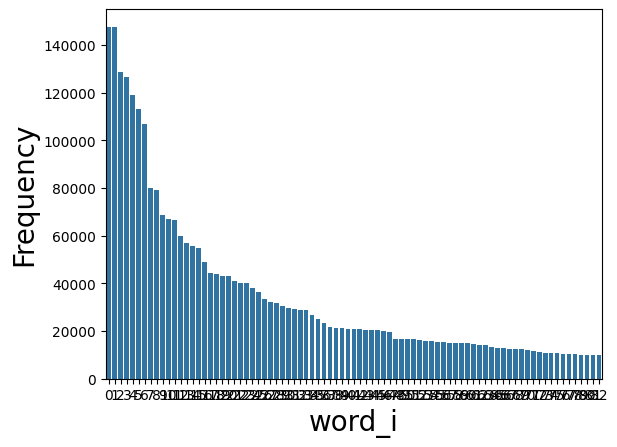

In [22]:
# sns.barplot(data=bin_counts)
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[:4739])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[1:4739])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[1:691])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

sns.barplot(data=bin_counts[1:84])
plt.xlabel("word_i",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

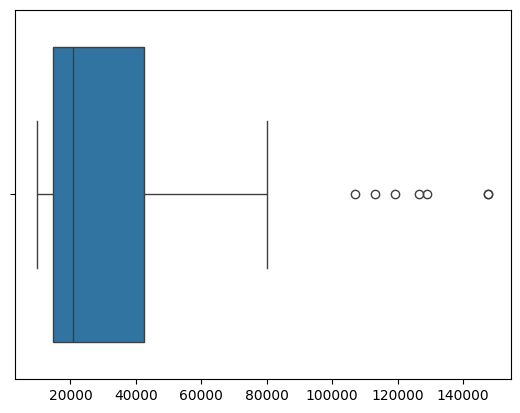

In [23]:
# sns.boxplot(x=bin_counts)
# plt.show()

# sns.boxplot(x=bin_counts[:4739])
# plt.show()

# sns.boxplot(x=bin_counts[1:4739])
# plt.show()

# sns.boxplot(x=bin_counts[1:691])
# plt.show()

sns.boxplot(x=bin_counts[1:83])
plt.show()

In [24]:
q1 = np.percentile(bin_counts[1:83], 25)
q3 = np.percentile(bin_counts[1:83], 75)
iqr = q3 - q1

lower_whisker = np.min(bin_counts[1:83][bin_counts[1:83] >= q1 - 1.5 * iqr])
upper_whisker = np.max(bin_counts[1:83][bin_counts[1:83] <= q3 + 1.5 * iqr])

print("Lower whisker:", lower_whisker)
print("Q1:", q1)
print("Median:", np.median(bin_counts[1:83]))
print("Q3:", q3)
print("Upper whisker:", upper_whisker)


Lower whisker: 9920
Q1: 14776.5
Median: 20693.5
Q3: 42496.0
Upper whisker: 79934


In [25]:
filtered_words = [word for word, count in global_sorted_words if 100 <= count < 1000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['michaels', 'todd', 'alternitive', 'catharsis', 'dakota', 'workshop', 'zack', 'sticky', 'rockpunk', 'patrick']


In [26]:
filtered_words = [word for word, count in global_sorted_words if 1000 <= count < 10000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['housewarming', 'pool', 'ages', 'marathon', 'funky', 'eminem', 'island', 'cruising', 'sweet', 'girl']


In [27]:
filtered_words = [word for word, count in global_sorted_words if 10000 <= count < 100000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['grad', 'favorite', 'indie', 'workout', 'pop', 'stuff', 'alt', 'morning', 'drive', 'mellow']


In [28]:
filtered_words = [word for word, count in global_sorted_words if 100000 <= count < 1000000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['oldies', 'summer', 'classic', 'good', 'old', 'rock', 'party', 'chill']


### Findings

 - 'rock' is the most common playlist word at ~400,000 count
 - next most common words are at ~100,000 count
 - Of the ~9,000 words counted across tracks:
   - 4,379 words are above 100
   - 1,983 words are above 300
   - 691 words are above 1000
   - 83 words are above 10,000
 - Consider doing a final bin count for each track using the 1,983 possible words
   - Too few words may lead to uninteresting possible dashboard results regarding the words
   - Too many words may be computationally expensive to filter and sort and visualize.

## Bin Count DataFrame